In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
ls

Credit_Card_Applications.csv  minisom.py  __pycache__/  som.py


In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#print(X)

In [0]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

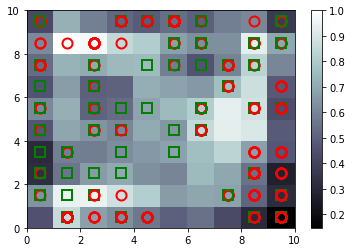

In [29]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()

In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,1)],mappings[(8,8)]),axis=0)
frauds = sc.inverse_transform(frauds)

In [0]:
#Creating matrix of features
customers = dataset.iloc[:,1:].values

#Creating the dependent variables
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i]=1

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)


Epoch 1/2
690/690 [==============================] - 1s 2ms/step - loss: 0.4835 - acc: 0.9754
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.1381 - acc: 0.9826


In [0]:
#Predicting the probablity of frauds
y_pred = classifier.predict(customers)

In [0]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]
print(y_pred)